In [2]:
import pandas as pd
import glob
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data_files = glob.glob("./*")
tpka_files = glob.glob("./tpka-log/*")
dfs = []

for file in data_files:
    if (file.endswith("server.xlsx") or file.endswith("csic_dataset_preprocessed.csv") or file.endswith("12.xlsx") or file.endswith("-dvwa.xlsx") or file.endswith("access_log_Jul95.xlsx") or file.endswith("sqli-fired.xlsx") or file.endswith("xss-fired.xlsx") or file.endswith("xss-fired-2.xlsx")) and (not file.endswith(".log.xlsx")) and (not file.endswith("_dataset.xlsx")):
        if file.endswith(".csv"):
            df_spain = pd.read_csv(file, encoding='latin1')
            continue
        else:
            df = pd.read_excel(file)
        # if(file.endswith("server.xlsx")):
        #     df = df.sample(n=3000,random_state=1234)
        print(file)
        dfs.append(df)
    else:
        continue

for file in tpka_files:
    if file.endswith(".xlsx"):
        print(file)
        df = pd.read_excel(file)
        dfs.append(df)

.\access_log_Jul95.xlsx
.\CI-dvwa.xlsx
.\lfi-dvwa.xlsx
.\moodle-worker-0_moodle-server.xlsx
.\moodle-worker-1_moodle-server.xlsx
.\moodle-worker-2_moodle-server.xlsx
.\myits-payroll2_logs_2025-03-12.xlsx
.\myits-url-shortener1-app-server-0_logs_2025-03-12.xlsx
.\myits-url-shortener1-app-server-1_logs_2025-03-12.xlsx
.\myits-url-shortener1-app-server-2_logs_2025-03-12.xlsx
.\myits-url-shortener1-app-server-3_logs_2025-03-12.xlsx
.\sqli-dvwa.xlsx
.\sqli-fired.xlsx
.\ssrf-dvwa.xlsx
.\xss-dvwa.xlsx
.\xss-fired-2.xlsx
.\xss-fired.xlsx
./tpka-log\access.1.xlsx
./tpka-log\access.10.xlsx
./tpka-log\access.11.xlsx
./tpka-log\access.12.xlsx
./tpka-log\access.13.xlsx
./tpka-log\access.14.xlsx
./tpka-log\access.2.xlsx
./tpka-log\access.3.xlsx
./tpka-log\access.4.xlsx
./tpka-log\access.5.xlsx
./tpka-log\access.6.xlsx
./tpka-log\access.7.xlsx
./tpka-log\access.8.xlsx
./tpka-log\access.9.xlsx
./tpka-log\access.xlsx


In [4]:
df_all = pd.concat(dfs, ignore_index=True)

522832
XSS: 14551
SQLI: 24971


C:\Users\ALFA\AppData\Local\Temp\ipykernel_27060\586770105.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_benign_label.index, y=non_benign_label.values, palette='Set2')


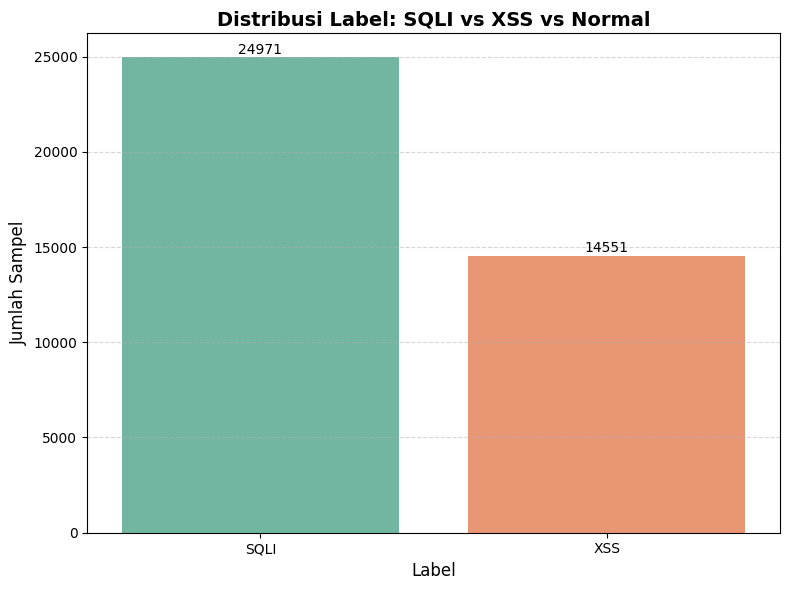

length benign before: 161750
length non_benign before: 39522
length benign after: 161750
length non_benign after: 39522


In [ ]:
from sklearn.model_selection import train_test_split
print(df_all.duplicated(subset=['url']).sum())
# cut rows with over than 300 characters in url
df_all = df_all[df_all['url'].str.len() <= 300]
df_all.drop_duplicates(subset=['url'], inplace=True)
benign_df = df_all[(df_all["label"] == "Benign")].copy()
malicious_labels = ["XSS", "SQLI"]
# malicious_labels = ["SQLI", "PATH_TRAVERSAL", "XSS", "COMMAND_INJECTION"]
non_benign_df = df_all[df_all["label"].isin(malicious_labels)].copy()

#print each malicious label count
for label in malicious_labels:
    print(f"{label}: {len(non_benign_df[non_benign_df['label'] == label])}")
non_benign_label = non_benign_df['label'].value_counts()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=non_benign_label.index, y=non_benign_label.values, palette='Set2')
plt.title('Distribusi Label: SQLI vs XSS vs Normal', fontsize=14, fontweight='bold')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Jumlah Sampel', fontsize=12)

# Tambahkan angka di atas bar
for index, value in enumerate(non_benign_label.values):
    plt.text(index, value + 20, str(value), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# show data
non_benign_df["label"] = "Malicious"
benign_df["label"] = "Benign"
benign_df.drop_duplicates(subset=['url'],inplace=True)
non_benign_df.drop_duplicates(subset=['url'],inplace=True)
print(f"length benign before: {len(benign_df)}")
print(f"length non_benign before: {len(non_benign_df)}")
print(f"length benign after: {len(benign_df)}")
print(f"length non_benign after: {len(non_benign_df)}")
benign_spain_df = df_spain[(df_spain["label"] == "Benign")].copy()
malicious_spain_df = df_spain[df_spain["label"] == "Malicious"].copy()
print(len(benign_spain_df))
print(len(malicious_spain_df))
benign_spain_df.drop_duplicates(subset=['url'], inplace=True)
malicious_spain_df.drop_duplicates(subset=['url'], inplace=True)
print(len(benign_spain_df))
print(len(malicious_spain_df))
benign_spain_train_df, benign_spain_test_df = train_test_split(benign_spain_df, test_size=0.2, random_state=1234)
malicious_spain_train_df, malicious_spain_test_df = train_test_split(malicious_spain_df, test_size=0.2, random_state=1234)
train_spain_df = pd.concat([benign_spain_train_df, malicious_spain_train_df], ignore_index=True)
test_spain_df = pd.concat([benign_spain_test_df, malicious_spain_test_df], ignore_index=True)
print(len(train_spain_df))
print(len(test_spain_df))

In [ ]:
balanced_df = pd.concat([benign_df, non_benign_df], ignore_index=True)
balanced_df = shuffle(balanced_df, random_state=1234).reset_index(drop=True)


In [ ]:
balanced_df.to_csv("csv_dataset_preprocessed.csv", index=False)